In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [4]:
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


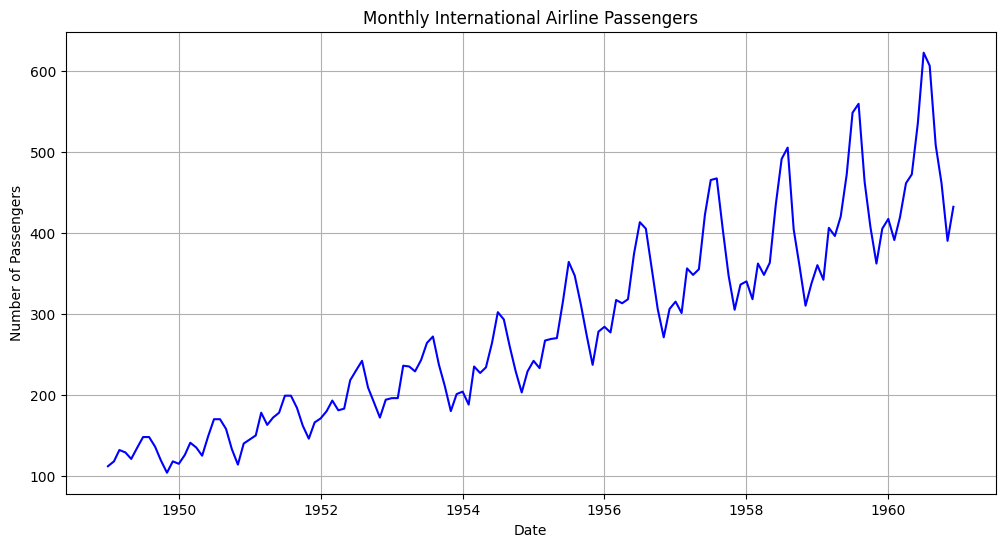

In [5]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df, color='blue')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
result = seasonal_decompose(df['Passengers'], model='multiplicative')

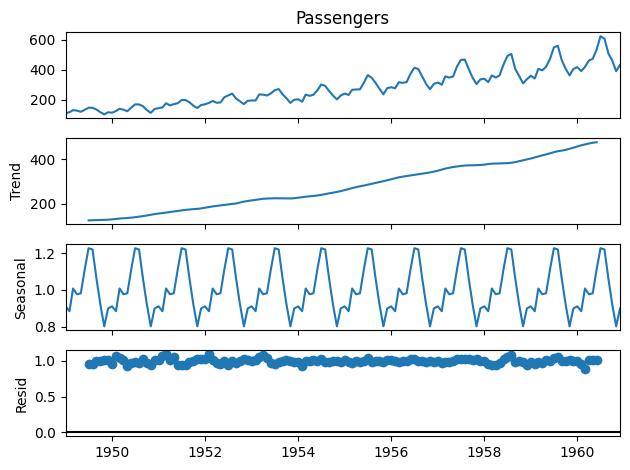

In [7]:
# Plot the decomposition
result.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [9]:
# Interpretation
if result[1] <= 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")

The data is not stationary.


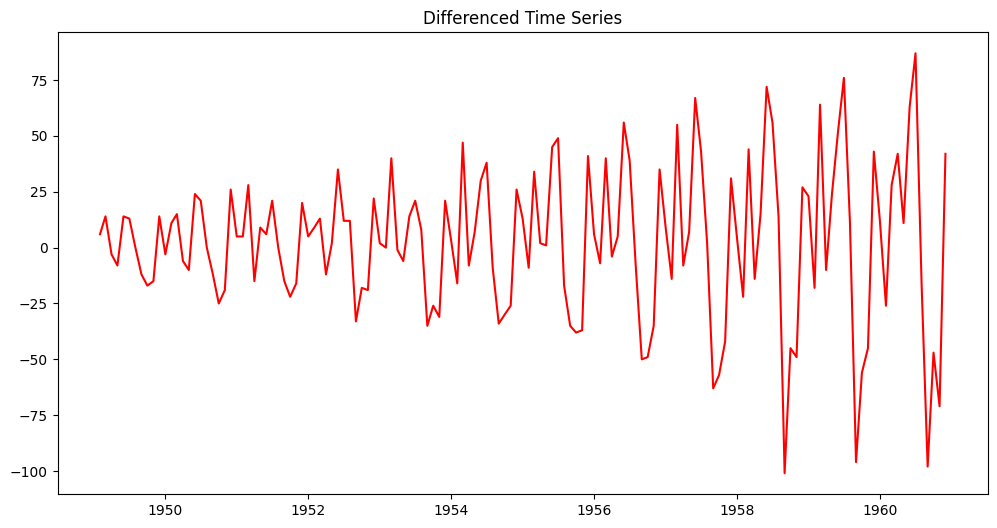

In [10]:
# First-order differencing
df_diff = df['Passengers'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, color='red')
plt.title('Differenced Time Series')
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Passengers'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
print("Forecasted values:\n", forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Wed, 15 Jan 2025   AIC                           1390.135
Time:                        08:01:21   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


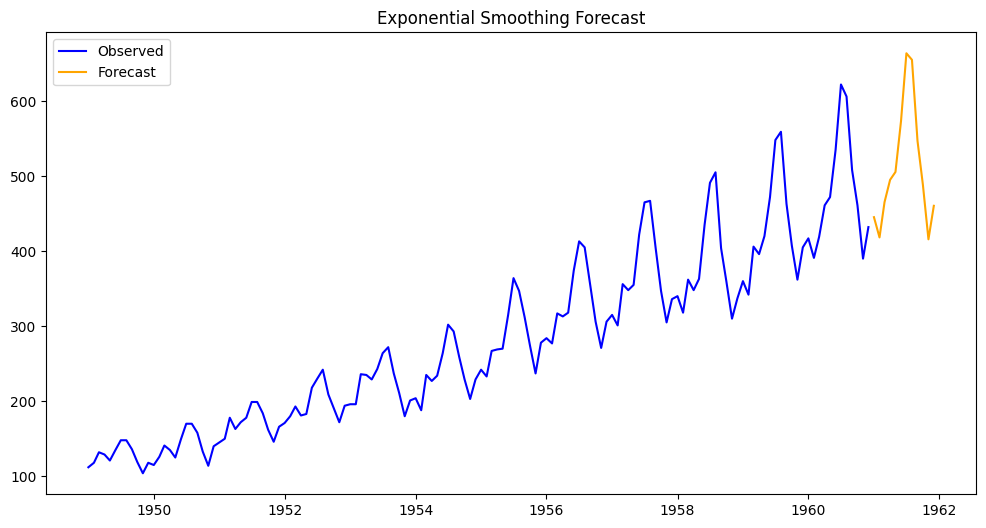

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='multiplicative', seasonal_periods=12)
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(12)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()
